<a href="https://colab.research.google.com/github/parkmicheal1114/study/blob/main/31%ED%9A%8CADP_%EA%B8%B0%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 설명

데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리

데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv

데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.
- id: unique id for each row    
- Gender: sex - male or female    
- Age: age    
- Height: height    
- Weight: weight    
- family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
- FAVC: Frequent consumption of high caloric food - yes or no     
- FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
- NCP: Number of main meals - 1, 2, 3, 4     
- CAEC: Consumption of food between meals - No, Sometimes, - Frequently, Always    
- SMOKE: Do you smoke - yes o no    
- CH2O: Consumption of water daily - Less than a litter, - between 1 and 2 l, more than 2 l    
- SCC: Calories consumption monitoring - yes or no   
- FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
- TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
- CALC: Consumption of alcohol - no, sometimes, frequently, always    
- MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
- BMI: Body mass index

(종속변수)     
NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

# 기계학습

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stat

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv' , index_col = 0)
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
1,11,male,26,1.85,105,yes,yes,always,3,frequently,no,more than 2 l,no,2 to 4,>5,sometimes,public_transportation,obesity_type_i,30.679328
2,14,male,41,1.80,99,no,yes,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,automobile,obesity_type_i,30.555556
3,18,female,29,1.53,78,no,yes,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,no,automobile,obesity_type_i,33.320518
4,20,female,23,1.65,70,yes,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_i,25.711662


## 1-1 EDA & 결측치 및 이상치를 판단하고 설명하라

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 1261
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1262 non-null   object 
 1   Gender                          1262 non-null   object 
 2   Age                             1262 non-null   int64  
 3   Height                          1262 non-null   float64
 4   Weight                          1262 non-null   int64  
 5   family_history_with_overweight  1262 non-null   object 
 6   FAVC                            1262 non-null   object 
 7   FCVC                            1262 non-null   object 
 8   NCP                             1262 non-null   int64  
 9   CAEC                            1262 non-null   object 
 10  SMOKE                           1262 non-null   object 
 11  CH2O                            1262 non-null   object 
 12  SCC                             12

- 결측치 처리
 - EDA 수행전에 결측치를 우선 처리 하도록 한다.이는 EDA 수행시 오류 발생을 최소화 하기 위함이다.
 - SCC 컬럼에 3개의 결측치가 관측되는데, 범주형 변수이므로 최빈값으로 대치 하도록 하겠다.

In [ ]:
df['SCC'] = df['SCC'].fillna(df['SCC'].mode()[0])

In [ ]:
df.isnull().sum()

- EDA

- 종속변수의 클래스 분포

<Axes: xlabel='NObeyesdad', ylabel='count'>

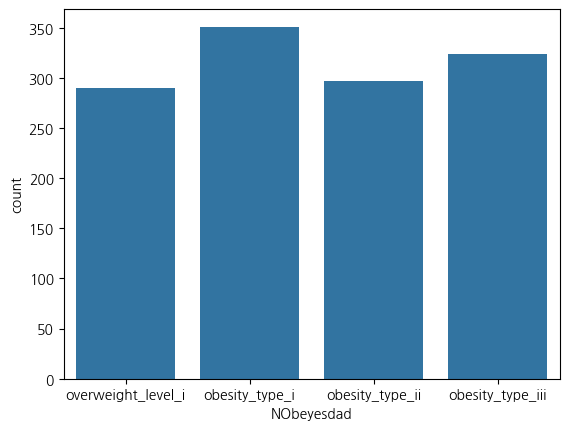

In [ ]:
sns.countplot(data = df , x = 'NObeyesdad')

In [ ]:
# 범주형 변수와 수치형 변수를 나누도록 한다.
cat_col = df.select_dtypes('object').columns
num_col = df.select_dtypes('number').columns

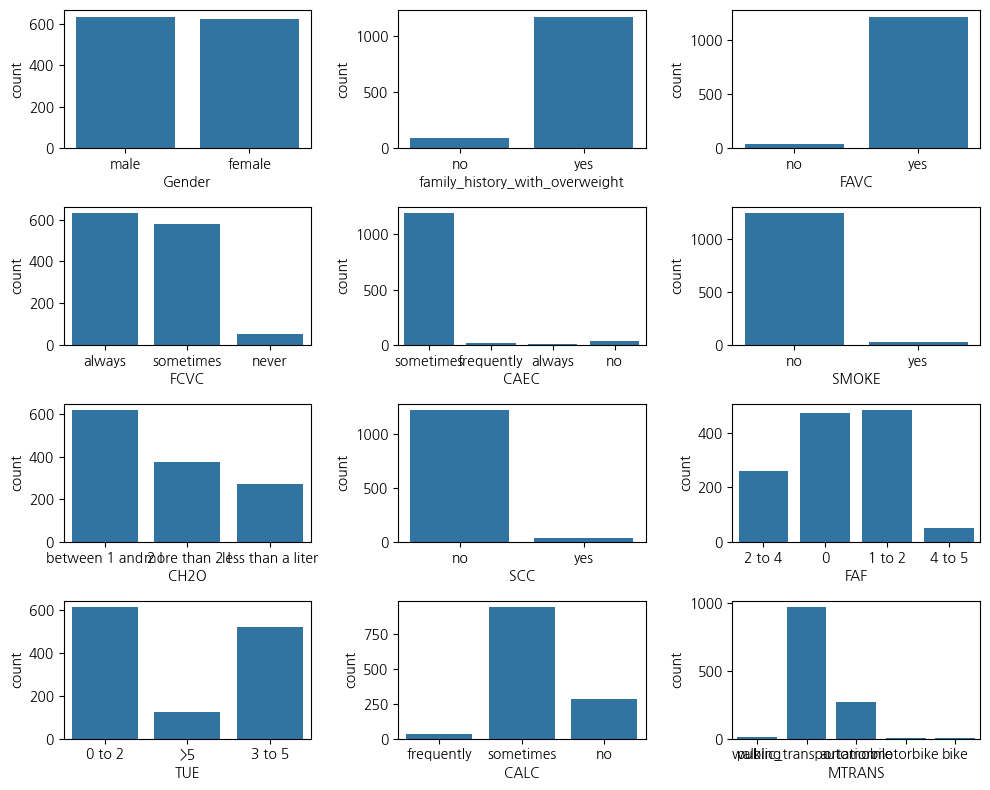

In [ ]:
# len(cat_col[1:-1]) :12

fig , ax = plt.subplots(nrows = 4 , ncols = 3 , figsize = (10 ,8))
for i,col in enumerate(cat_col[1:-1]):
  sns.countplot(data =df , x = col, ax = ax[i//3 , i%3])
plt.tight_layout()

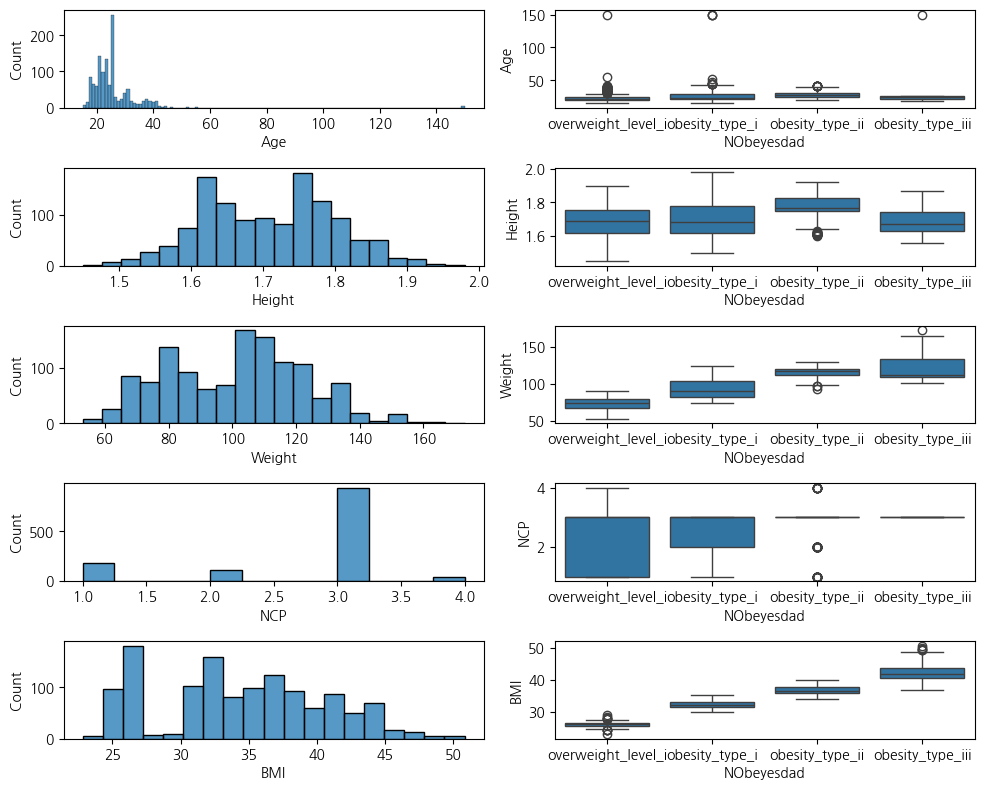

In [ ]:
fig , ax = plt.subplots(nrows = 5 , ncols = 2 , figsize = (10 ,8))
for i,col in enumerate(num_col):
  sns.histplot(data =df , x = col, ax = ax[i,0])
  sns.boxplot(data =df , x ='NObeyesdad', y = col , ax = ax[i,1])
plt.tight_layout()

- 이상치 제거

In [ ]:
# 나이가 150세인 데이터 제외
df = df[~(df['Age']>100)]

> 설명
- SCC에서 관측된 결측치는 최빈값으로 대치 하였다.
- 종속변수는 class 의 불균형이 관측 되었다.하지만 큰 차이가 아니기 때문에 모델구현시 classweight 을 통해서 클래스간 각기 다른 가중치를 부가 하도록 하겠다.
- 범주형 변수들의 경우도 값들간의 빈도 차이가 크게 발생 하고 있는데 , 이에 대한 편향성 문제가 발생 할수도 있을 것이라 판단되는데 , 이를 위한 적절한 처리가 필요로 할 수 도 있을것으로 판단된다.
- 수치형 변수들의 분포를 보게 되면 , BMI와 Weight은 종속변수에 큰 영향을 끼칠 것으로 판단된다.
- AGE 변수에서 150세의 데이터 들이 여러개 관측 되었는데 이는 이상치로 보이며 , 이를 제외한 데이터셋으로 이후 분석에 사용하겠다.

## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

> 답변

1. 데이터 인코딩
  - 범주형 데이터들을 모델이 학습가능한 수치형 데이터로 변형 해 주는 기법으로 이산형 데이터로 변경하는 LabelEncoding 과 OneHotEncoding 기법 두가지가 대표적으로 사용된다.
  - 해당 데이터는 범주형 데이터들이 많아서 OneHotEncoding 을 적용하게 되면 변수들이 많아지면서 모델 성능이 저하될 우려가 있다. 이에 Label Encoding 을 적용하도록 하겠다.

2. 데이터 스케일링
 - 수치형 데이터를 정규화 해주는 방법으로 각기 다른 척도로 되어 있는 수치데이터 들을 하나의 척도로 정규화 시켜주는 방법이다. 대표적으로 정규분포를 기준으로 하는 Standard Scaling방법 과 최대값/최소값을 1/0 기준으로 하는 MinMaxScaler 등이 있습니다.
 - 해당 데이터는 범주형 변수들이 많으며 , 분류 문제이기 때문에 우선적으로 MinMaxScaler를 통해서 스케일링을 진행 하도록 하겠다.

## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

- 이산형 수치 변수인 AGE 컬럼에 대해서 binnig 으로 처리 하여 파생 변수를 생성 하겠다. 이를 통해서 나이를 복잡하지 않게 단순하게 처리 함으로서 모델링이 효율적으로 적용되게 하겠다.

In [ ]:
df['Age_bin'] = pd.cut(df['Age'] , bins = [0 , 20 , 40 , 60 , 100] , labels = ['~20y' , '~40yr', '~60yr', '~100yr'])

## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score , classification_report

In [ ]:
# Encoding
cat_col =  ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Age_bin', 'NObeyesdad']

encoder = {}
for col in cat_col:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoder[col] = le

In [ ]:
# Scailing
df = df.drop('id' , axis = 1)
feature = df.drop('NObeyesdad' , axis =1)
target = df['NObeyesdad']

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(feature)
feature = pd.DataFrame(data =scale_data , columns = feature.columns)


In [ ]:
# 학습 ,검증 데이터 분리
train_x , test_x , train_y , test_y  = train_test_split(feature , target , test_size= 0.3 ,random_state= 1114 )


model_lr = LogisticRegression(class_weight='balanced' , random_state =1114)
model_dt = DecisionTreeClassifier(class_weight='balanced' , random_state =1114)
model_svc = SVC(kernel= 'rbf' , class_weight='balanced' , probability= True , random_state = 1114)

models = [model_lr , model_dt , model_svc]
pred_score = {}

for model in models:
  model.fit(train_x , train_y)
  pred = model.predict(test_x)
  score = f1_score(test_y , pred , average= 'macro')
  model_name = type(model).__name__
  pred_score[model_name] = score


In [ ]:
pd.Series(pred_score).to_frame().rename({0 : 'F1'} , axis = 1)

,F1
LogisticRegression,0.934022
DecisionTreeClassifier,0.986735
SVC,0.966013


> 답변
- 로지스틱회귀(선형기반) , SVC(선형결정경계선 기반) , 의사결정나무(Tree 기반)  3가지 모델로 구축을 하였으며 , 지표는 다중분류의 정확성을 위해서 Macro F1-score 를 사용하였다.
- 데이터셋의 불균형을 보완하기 위해서 개별 class에 가중치를 balanced 방법을 취했다.
- 의사결정나무의 지표가 가장 높게 측정되었으며 , 이후 과정 에서 모델 고도화를 통해서 일반화 성능을 높이 도록 한다.

## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

In [ ]:
from sklearn.model_selection import GridSearchCV
# 파라미터
params = {
    'max_depth':[3,5,7],
    'min_samples_split':[3, 5, 7],
    'min_samples_leaf':[1,5,10]
}

# GridSerchcv를 통한 파라미터 튜닝
grid= GridSearchCV(model_dt , param_grid= params , scoring='f1_macro')
grid.fit(train_x , train_y)
print(grid.best_params_)
print(grid.best_score_)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.9887839654707407


In [ ]:
# 최종 모델 평가
grid_dt = grid.best_estimator_
grid_dt.fit(train_x , train_y)
pred = grid_dt.predict(test_x)
print(classification_report(test_y , pred))

print('SoftVoting 의  F1_Score', f1_score(test_y , pred , average= 'macro'))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.96      0.98      0.97        94
           2       0.99      1.00      0.99        83
           3       1.00      1.00      1.00       103

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378

SoftVoting 의  F1_Score 0.984131573232047


> 답변
- 그리드서치를 통해서 하이퍼파라미터 튜닝을 통한 f1-score는 하지 않았던 것과 크게 차이가 나지 않았다고 생각한다.
- 모델의 prescision 과 recall 지표가 편향되지 않고 균일하게 관측됨으로서 모델의 일부 클래스에 크게 편향되지 않고 있다고 생각된다.

## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [ ]:
from sklearn.ensemble import VotingClassifier

models = [('lr',model_lr) , ('dt',model_dt) , ('svc' ,model_svc)]

soft_vote = VotingClassifier(estimators = models ,voting= 'soft')
soft_vote.fit(train_x , train_y)
vote_pred  = soft_vote.predict(test_x)
print(classification_report(test_y , vote_pred))

print('SoftVoting 의  F1_Score', f1_score(test_y , vote_pred , average= 'macro'))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.96      0.98      0.97        94
           2       0.99      1.00      0.99        83
           3       1.00      1.00      1.00       103

    accuracy                           0.98       378
   macro avg       0.98      0.98      0.98       378
weighted avg       0.98      0.98      0.98       378

SoftVoting 의  F1_Score 0.984131573232047


> 답변
- 튜닝한 모델과 SoftVoting한 모델의 결과는 동일하게 관측되고 있다. 다른 이슈가 없었으며 , Voting 과 파라미터 튜닝한 모델의 성능이 그렇지 않은 모델보다 좋을 거라고 생각하지 않는다.

## 3-2 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

In [ ]:
from sklearn.metrics import recall_score

scores= {}

model_dt.fit(train_x , train_y)
pred_total = model_dt.predict(test_x)
score_total = recall_score(test_y , pred_total , average= 'macro')

for col in train_x.columns:
  train = train_x.drop(col , axis =1)
  test = test_x.drop(col , axis =1 )
  model_dt.fit(train , train_y)
  pred = model_dt.predict(test)
  score = recall_score(test_y , pred , average= 'macro')
  scores[col] = score_total-score

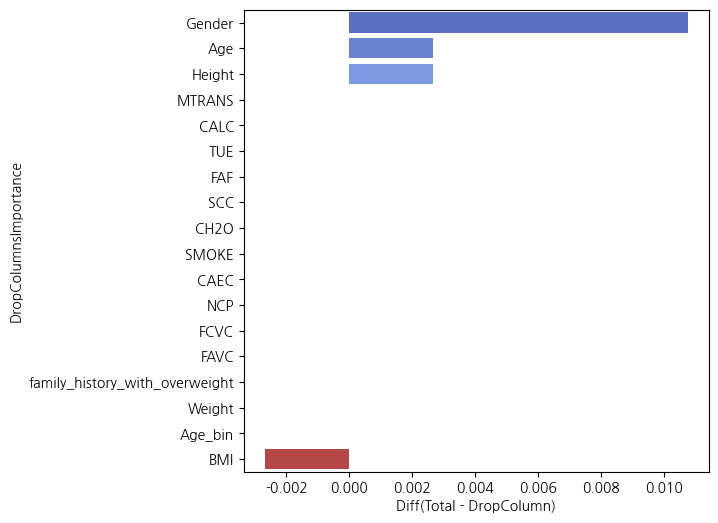

In [ ]:
temp = pd.Series(scores).sort_values(ascending = False)

plt.figure(figsize = (6,6))
sns.barplot(x = temp.values , y = temp.index , palette = 'coolwarm')
plt.ylabel('DropColumnsImportance')
plt.xlabel('Diff(Total - DropColumn)')
plt.show()

> 답변
- 전체 컬럼이 포함한 모델의 지표와의 Drop Column 을 통해서 산출한 지표의 차이를 비교 했을때 , 성능에 끼치는 영향은 BMI 변수가 가장 중요하며 , Gender가 가장 약하다는 것을 관측 할 수 있다. 그 외 변수들은 모델 성능에 영향이 없다고 생각 할 수 있다.

# 4

- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 BMI를 5단위로 구분하여 와 적정 체중여부에 대한 빈도 표를 만들어라

>bmi 계산

- Bmi = 몸무게(kg)/(키(m)**2)   

>만나이 구하기

- 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
- 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


- 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)
- 17세 남자 : 21.03이상 23.21 미만
- 17세 여자 : 20.03이상 22.39 미만
- 16세 남자 : 21.18이상 23.45 미만
- 16세 여자 : 19.61이상 21.74 미만

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df.head()

In [ ]:
df['생년월일'] = pd.to_datetime(df['생년월일'] ,format = '%Y%m%d')
df['건강검진일'] = pd.to_datetime(df['건강검진일'] ,format = '%Y_%m_%d')

In [ ]:
# BMI
df['BMI'] = df['weight']/(df['키']/100)**2

In [ ]:
from datetime import datetime

now_date =datetime.now()

# 만나이 구하기
def age_cal(x):
  age = now_date.year - x.year
  if (x.month >= now_date.month) or ((x.month == now_date.month) and (x.day > now_date.day)):
    age -=1
  return age

df['만나이'] = df['생년월일'].apply(age_cal)

In [ ]:
df['BMI'] = df['BMI'].apply(lambda x : round(x , 2))
df['BMI_bin'] = pd.qcut(df['BMI'] , 5 , labels = [1,2,3,4,5])
df['BMI_bin'].value_counts()

In [ ]:
def weight_detect(x):
  if (x['성별']== '남성') & (23.21 > x['BMI'] >= 21.03) & (x['만나이']== 17):
    return '적정'
  elif (x['성별']== '여자') & (22.39 > x['BMI'] >= 20.03) & (x['만나이']== 17):
    return '적정'
  elif (x['성별']== '남자') & (23.45 > x['BMI'] >= 21.18) & (x['만나이']== 16):
    return '적정'
  elif (x['성별']== '여자') & (21.74 > x['BMI'] >= 19.61) & (x['만나이']== 16):
    return '적정'
  else:
    return '비적정'

df['적정체중여부'] = df.apply(weight_detect , axis =1)


In [ ]:
df['적정체중여부'].value_counts()

비적정    6638
적정      163
Name: 적정체중여부, dtype: int64

## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

In [ ]:
# 범주형 변수에 대한 독립성 검정
cat_cols = ['공학여부' ,'아침식사여부' , '채소섭취정도' , '성별']

chi2 = {}

for col in cat_cols:
  temp = pd.crosstab(df['적정체중여부'], df[col])
  p_value = stat.chi2_contingency(temp).pvalue

  if p_value >= 0.05:
    chi2[col] = ('귀무가설채택',p_value)
  else:
    chi2[col] = ('대립가설채택',p_value)



In [ ]:
# 수치형 변수에 대한 독립성 검정
cat_cols = ['일주일운동시간' , '수면시간']

ttest = {}
for col in cat_cols:
  temp = df.loc[df['적정체중여부']=='적정' , col]
  temp2 = df.loc[df['적정체중여부']=='비적정' , col]
  p_value = stat.ttest_ind(temp , temp2).pvalue
  if p_value >= 0.05:
    ttest[col] = ('귀무가설채택',p_value)
  else:
    ttest[col] = ('대립가설채택',p_value)

display(pd.Series(chi2).apply(pd.Series).rename({0:'Chi검정', 1:'P-value'} , axis =1))
display(pd.Series(ttest).apply(pd.Series).rename({0:'ttest검정', 1:'P-value'} , axis =1))

,Chi검정,P-value
공학여부,대립가설채택,3.471578e-02
아침식사여부,귀무가설채택,5.263451e-02
채소섭취정도,귀무가설채택,1.119725e-01
성별,대립가설채택,1.185628e-48


,ttest검정,P-value
일주일운동시간,귀무가설채택,0.711095
수면시간,귀무가설채택,0.061753


> 답변
- 범주형변수에 대한 독립성 검정은 카이제곱검정을 시행 하였다.'아침식사여부' 와 '채소섭취정도'는 p-value가 0.05보다 크기 때문에 귀무가설을 채택 하였으므로 , 두 변수는 '적정체중여부'와 통계적으로 독립적이라고 할수 있다.  
- 수치형변수에 대한 정규성 검정은 독립t 검정을 시행 하였으며, 정규성과 등분산성을 만족한다고 가정 하였다.우선 '일주일운동시간'과'수면시간'은 귀무가설을 채택 하였으며 , 이는 '적정체중여부'와 통계적으로 독립적이지 않다고 할 수 있다

## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)

In [ ]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score , roc_curve ,auc

In [ ]:
# ID 컬럼제거
df = df.drop(['생년월일' , '건강검진일', 'ID'] , axis = 1)

# 가변수 처리
df_1 = pd.get_dummies(df , columns = ['성별'])

feature = df_1.drop('적정체중여부', axis =1)
target = df_1['적정체중여부'].map({'적정':1 , '비적정':0})

# 데이터 스케일링
scale = MinMaxScaler()
scale_data= scale.fit_transform(feature)


In [ ]:
scale_data = pd.DataFrame(scale_data , columns  = feature.columns)

# 데이터분리
train_x , test_x , train_y , test_y = train_test_split(scale_data , target , test_size= 0.3 , random_state = 1114)

# 로지스틱 회귀 모델
lr_model = LogisticRegression(class_weight= 'balanced' , random_state = 1114)
lr_model.fit(train_x , train_y)
pred_lr = lr_model.predict(test_x)
pred_f1_lr = f1_score(test_y , pred_lr)

# XGB 모델
xgb_model = XGBClassifier(class_weight= 'balanced', random_state = 1114)
xgb_model.fit(train_x , train_y)
pred_xgb = xgb_model.predict(test_x)
pred_f1_xgb = f1_score(test_y , pred_xgb)

In [ ]:
from sklearn.model_selection import cross_val_score
print("로지스틱회귀 F1스코어 ", cross_val_score(lr_model , test_x ,test_y , cv= 5 , scoring = 'f1').mean())
print("XGB모델의 F1 스토어 " ,  cross_val_score(xgb_model , test_x ,test_y , cv= 5 , scoring = 'f1').mean())

로지스틱회귀 F1스코어  0.3860989164667357
XGB모델의 F1 스토어  0.9894736842105264


<Axes: xlabel='Coef', ylabel='None'>

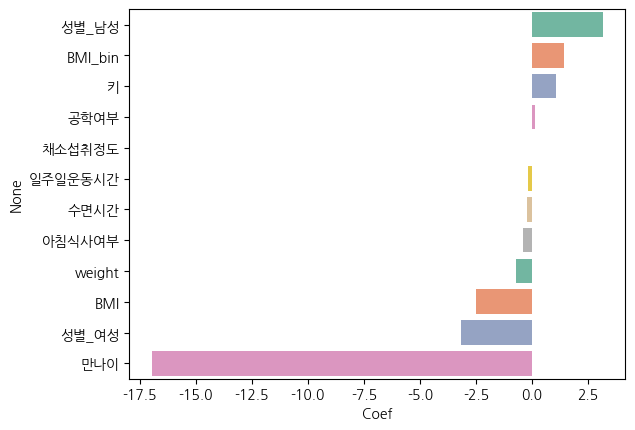

In [ ]:
# 로지스틱회귀 모델의 회귀계수
lr_coef = pd.DataFrame(lr_model.coef_.flatten() , index = feature.columns , columns = ['Coef'])
lr_coef = lr_coef.sort_values('Coef' , ascending = False)
sns.barplot(x = lr_coef['Coef'] , y =lr_coef.index , palette = 'Set2' )

<Axes: xlabel='Importance', ylabel='None'>

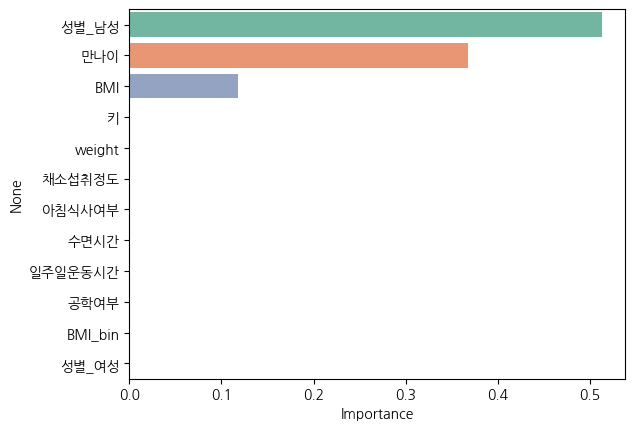

In [ ]:
# 로지스틱회귀 모델의 회귀계수
xgb_importance = pd.DataFrame(xgb_model.feature_importances_.flatten() , index = feature.columns , columns = ['Importance'])
xgb_importance = xgb_importance.sort_values('Importance' , ascending = False)
sns.barplot(x = xgb_importance.Importance , y = xgb_importance.index , palette = 'Set2')

> 답변
- 적정체중여부의 클래스 불균형이 매우 심각한 편이라서 accuracy 는 신뢰성을 가진 지표가 되지 못한다.그렇기 때문에 f1-score를 사용하였다.
- xgb 모델의 성능 지표가 로지스틱회귀 모델에 비해서 높음을 알 수 있다.
- 각각 변수에 계수와 중요도를 살펴보면 XGB 모델의 경우 BMI , 만나이 , 성별-남성의 feature에 매무 민감하게 반응 했으며 , 나머지 변수의 중요도는 매우 낮은 것으로 확인 됐다.

## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라


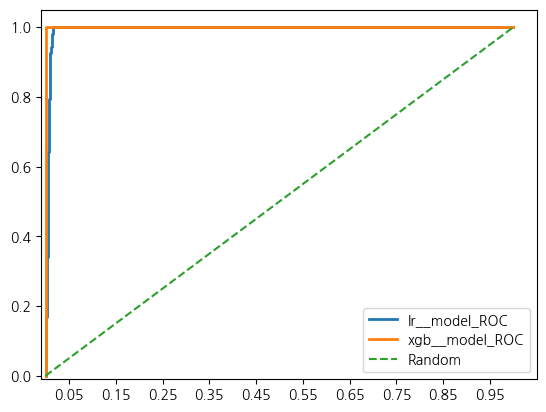

In [ ]:
# 모델의 '적정'예측 확률 계산
proba_lr = lr_model.predict_proba(test_x)[:,1]
proba_xgb = xgb_model.predict_proba(test_x)[:,1]

# ROC-Cureve 시각화
fqr ,tqr ,threshold = roc_curve(test_y , proba_lr)
fqr1 ,tqr1 ,threshold1 = roc_curve(test_y , proba_xgb)
plt.plot(fqr , tqr ,lw =2,  label = 'lr__model_ROC')
plt.plot(fqr1 , tqr1,lw = 2, label = 'xgb__model_ROC')
plt.plot([0,1],[0,1] ,linestyle = '--' ,label = 'Random')
start , end = plt.xlim()
plt.xticks(np.round(np.arange(start , end , 0.1),2 ))
plt.xlim([-0.01,1.05])
plt.ylim([-0.01,1.05])
plt.legend()

# 통계

## 5. 평균이  θ이고 분산이 100인 정규분포의 사전분포가 100, 256일때 120의 값을 가지는 데이터가 있을 경우 사후평균은? (5점)

In [ ]:
# N(100,256)
# 베이지안 통계에서 사후 분포를 계산하는 방법
mu_prior = 100
sigma_prior = 256
mu = 120
sigma = 100

(sigma * mu_prior + sigma_prior * mu) / (sigma + sigma_prior)


114.38202247191012

> 이해 못함...

# 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
종속변수 : Sales

## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [ ]:
# Data Load
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
df.head()

In [ ]:
import statsmodels.formula.api as sm
result = sm.ols('Sales~TV+Radio+Newspaper' , data = df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           8.13e-99
Time:                        02:57:20   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> 답변
- Newspaper의 t통계량의 p-value가 유의수준(0.05라 가정)보다 높다 . 이는 변수의 회귀계수에 대해서 귀무가설을 지지 할 수 있으며 , 통계적으로 Nespaper는 유의하지 않은 변수라고 얘기 할수 있다

## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

> 답변
- NewsPaper
- 유의수준(0.05)보다 높다. 이 회귀계수는 통계적인 유의미성을 가지지 못한다고 봐야 한다.

## 6-3 VIF를 통한 다중공선성 진단

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 상수항 추가
x = add_constant(df.drop('Sales' , axis = 1))

vif = pd.DataFrame()
vif['VIF'] =  [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,VIF,features
0,6.848900,const
1,1.004611,TV
2,1.144952,Radio
3,1.145187,Newspaper


> 답변
- VIF 값은 커질수록 다중공선성 문제가 있다고 볼수 있다.하지만 진단에서 모든 변수들이 1에 가까운 값을 가지고 있는데 이는 변수들간의 상관관계가 거의 없다고 볼 수 있다.

## 7
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv' , index_col = 0)
df.head() , df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, contract_1 to contract_12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       12 non-null     int64
 1   B       12 non-null     int64
 2   C       12 non-null     int64
 3   D       12 non-null     int64
 4   E       12 non-null     int64
dtypes: int64(5)
memory usage: 576.0+ bytes


(            A  B  C  D  E
 contract_1  1  0  1  1  1
 contract_2  0  1  0  1  0
 contract_3  1  0  0  0  0
 contract_4  0  1  1  1  1
 contract_5  0  1  0  1  0,
 None)

In [ ]:
# 계약 성사 건 수 평균의 차이라고 보고 , 일원분석 ANOVA로 통계검정을 진행한다.
df_a = df['A']
df_b = df['B']
df_c = df['C']
df_d = df['D']
df_e = df['E']

stat.f_oneway(df_a , df_b , df_c , df_d , df_e)

F_onewayResult(statistic=1.1596385542168675, pvalue=0.3386526461881183)

> 답변
- 귀무가설 : 영업사원간의 계약 성사 건수의 평균적인 차이는 없다
- 대립가설 : 영업사원간의 계약 성사 건수의 평균적인 차이는 있다.
- 일원ANOVA 를 통해서 검정을 진행 했고 , p-value는 0.338 이다. 유의수준(0.05라고 가정) 할때 이는 귀무가설을 채택할 수 있으며 , 영업사원간의 계약 성가 건수의 평균 차이는 통계적으로 차이가 나지 않는다고 할 수 있다.

## 8 유기견이 하루에 2.2마리 발생한다 (10점)
## 8-1 한 마리도 안 버려질 확률

In [ ]:
# 푸아송 확률 분포
rv = stat.poisson(2.2)

print('한마리도 버려지지 않을 확률 ' , np.round(rv.pmf(0) , 4))

한마리도 버려지지 않을 확률  0.1108


## 8-2 적어도 2마리 버려질 확률

In [ ]:
# 2마리 이상 버려질 확률 이다.
print('적어도 2마리 버려질 않을 확률 ' , np.round(1 - rv.cdf(1) ,4))

적어도 2마리 버려질 않을 확률  0.6454
